<a href="https://colab.research.google.com/github/mozito02/Mozito-abir/blob/main/Movierating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Data load

In [7]:


data = pd.read_csv('Movie.csv', encoding='ISO-8859-1')


print(data.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

Get summary statistics of numeric columns

Check data types and missing values


In [8]:

print(data.describe())


print(data.info())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


 Data Cleaning

In [9]:

data.fillna(0)


data.drop_duplicates(inplace=True)



Data Visualisation for EDA

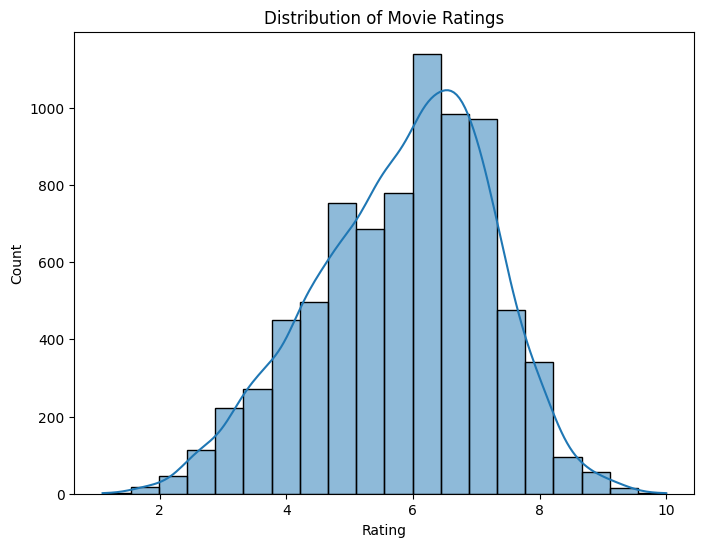

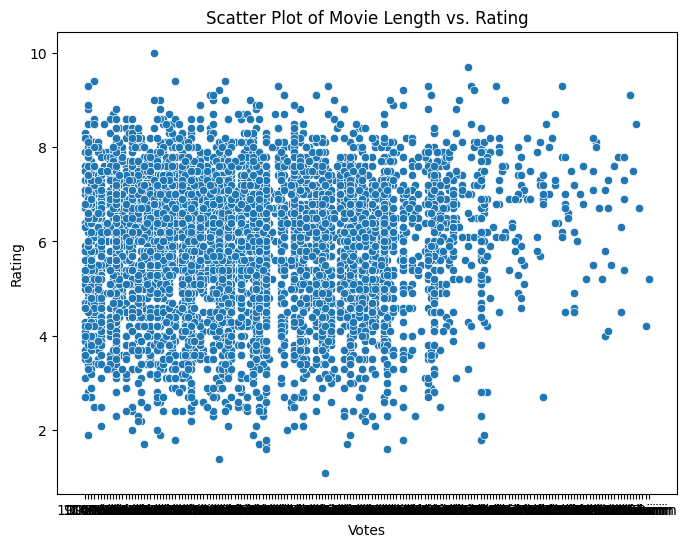

In [16]:


# Histogram of movie ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.title('Distribution of Movie Ratings')
plt.show()

# Scatter plot of movie length vs. rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Duration', y='Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Scatter Plot of Movie Length vs. Rating')
plt.show()



Cleaning the movie names

In [19]:
import pandas as pd

# Load your IMDb movie dataset into a Pandas DataFrame
data = pd.read_csv('Movie.csv', encoding='ISO-8859-1')

# Clean movie names
data['Name'] = data['Name'].str.strip()
data['Name'] = data['Name'].str.replace(r'[#@\[\]]', '', regex=True)
data['Name'] = data['Name'].str.replace(r'\s+', ' ', regex=True)
data['Name'] = data['Name'].str.title()

print(data['Name'].head())


0                                     
1    Gadhvi (He Thought He Was Gandhi)
2                           Homecoming
3                               Yaaram
4                    ...And Once Again
Name: Name, dtype: object


Fixing the Year column

In [26]:
# Remove '-' character from 'Year' column
data['Year'] = data['Year'].str.replace('-', '', regex=False)


 Year with the Best Rating:

In [27]:
# Year with the best average rating
best_rating_year = data.groupby('Year')['Rating'].mean().idxmax()
print(f"Year with the best average rating: {best_rating_year}")


Year with the best average rating: (1948)


Does Length of Movie Have Any Impact on Rating:

In [40]:
# Remove 'min' suffix and convert 'Duration' to numeric (replace non-convertible values with NaN)
data['Duration'] = pd.to_numeric(data['Duration'].str.replace('min', '').str.strip(), errors='coerce')

# Now, convert the 'Duration' column to integers, treating NaN as 0 (or any other default value you prefer)
data['Duration'] = data['Duration'].fillna(0).astype(int)


correlation = data['Duration'].corr(data['Rating'])
print(f"Correlation between movie length and rating: {correlation}")


Correlation between movie length and rating: 0.09243958486443653


Top 10 Movies According to Rating per Year and Overall:


In [43]:
# Top 10 movies according to rating per year
top_movies_per_year = data.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating'))

# Reset index to avoid ambiguity
top_movies_per_year = top_movies_per_year.reset_index(drop=True)

# To print the top movies per year, you can use a loop:
for year, group in top_movies_per_year.groupby('Year'):
    print(f"Top 10 movies in {year}:")
    print(group[['Name', 'Rating']])


Top 10 movies in (1913):
               Name  Rating
0  Mohini Bhasmasur     NaN
Top 10 movies in (1914):
               Name  Rating
1  Satyavan Savitri     NaN
Top 10 movies in (1915):
                         Name  Rating
2  Death Of Narayanrao Peshwa     NaN
Top 10 movies in (1917):
          Name  Rating
3  Lanka Dahan     6.7
Top 10 movies in (1922):
    Name  Rating
4  Karna     NaN
Top 10 movies in (1923):
                  Name  Rating
5  Bhakta Gora Kumbhar     NaN
6        Kanya Vikraya     NaN
7    Ram Maruti Yuddha     NaN
Top 10 movies in (1924):
           Name  Rating
8  Sita Shuddhi     NaN
Top 10 movies in (1926):
              Name  Rating
9  Ram Rajya Vijay     NaN
Top 10 movies in (1928):
           Name  Rating
10  Kanak Kanta     NaN
11        Karna     NaN
Top 10 movies in (1930):
           Name  Rating
12    Ram Rahim     NaN
13  Veer Na Ver     NaN
Top 10 movies in (1931):
                      Name  Rating
14                 Kalidas     6.2
15  The Light Of 

 Number of Popular Movies Released Each Year:

In [32]:

popularity_threshold = 8.0
popular_movies_by_year = data[data['Rating'] > popularity_threshold].groupby('Year').size()
print("Number of popular movies released each year:")
print(popular_movies_by_year)


Number of popular movies released each year:
Year
(1934)     1
(1938)     1
(1940)     1
(1943)     2
(1946)     1
          ..
(2017)    17
(2018)    24
(2019)    31
(2020)    21
(2021)    23
Length: 68, dtype: int64


 Counting the Number of Votes for Movies That Performed Better in Rating:

In [34]:

top_rated_movies = data[data['Rating'] > popularity_threshold]
votes_by_movie = top_rated_movies.groupby('Name')['Votes'].sum()
print("Number of votes for top-rated movies:")
print(votes_by_movie)


Number of votes for top-rated movies:
Name
1971                           1,892
3 Idiots                     357,889
A Billion Colour Story           412
A Wednesday                   75,118
Aandhi                         1,406
                              ...   
Writing With Fire                106
Yatrik                             8
Yeh Suhaagraat Impossible        500
Zindagi Ek Safar                  33
Zindagi Na Milegi Dobara      70,344
Name: Votes, Length: 285, dtype: object


 Director with the Most Movies:

In [35]:

director_most_movies = data['Director'].value_counts().idxmax()
print(f"Director with the most movies: {director_most_movies}")


Director with the most movies: Jayant Desai


 Actor Analysis:

In [38]:
# Actor who starred in the most movies
actor_most_movies = data['Actor 1'].value_counts().idxmax()
print(f"Actor who starred in the most movies: {actor_most_movies}")


Actor who starred in the most movies: Ashok Kumar
